<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Monte-Carlo-Prediction" data-toc-modified-id="Monte-Carlo-Prediction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Monte Carlo Prediction</a></span></li><li><span><a href="#Monte-Carlo-Estimation-of-Action-Values" data-toc-modified-id="Monte-Carlo-Estimation-of-Action-Values-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Monte Carlo Estimation of Action Values</a></span></li><li><span><a href="#Monte-Carlo-Control" data-toc-modified-id="Monte-Carlo-Control-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Monte Carlo Control</a></span></li><li><span><a href="#Monte-Carlo-Control-without-Exploring-Starts" data-toc-modified-id="Monte-Carlo-Control-without-Exploring-Starts-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Monte Carlo Control without Exploring Starts</a></span></li><li><span><a href="#Off-policy-Prediction-via-Importance-Sampling" data-toc-modified-id="Off-policy-Prediction-via-Importance-Sampling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Off-policy Prediction via Importance Sampling</a></span></li></ul></div>

# Monte Carlo Methods

Monte Carlo methods require only experience—sample sequences of states, actions, and rewards from actual or simulated interaction with an environment. Learning from actual experience is striking because it requires no prior knowledge of the environment’s dynamics, yet can still attain optimal behavior.

Monte Carlo methods are ways of solving the reinforcement learning problem based on
averaging sample returns.

## Monte Carlo Prediction

We begin by considering Monte Carlo methods for learning the state-value function for a given policy.

An obvious way to estimate it from experience, then, is simply to average the returns observed after visits to that state. As more returns are observed, the average should converge to the expected value. This idea underlies all Monte Carlo methods. 

In particular, suppose we wish to estimate $v_\pi(s)$, the value of a state s under policy $\pi$, given a set of episodes obtained by following $\pi$ and passing through s. Each occurrence of state s in an episode is called a visit to s. Of course, s may be visited multiple times in the same episode; let us call the first time it is visited in an episode the first visit to s. The first-visit MC method estimates $v_\pi(s)$ as the average of the returns following first visits to s, whereas the every-visit MC method averages the returns following all visits to s.



## Monte Carlo Estimation of Action Values

If a model is not available, then it is particularly useful to estimate action values (the values of state–action pairs) rather than state values.

The policy evaluation problem for action values is to estimate $q_\pi(s, a)$, the expected return when starting in state s, taking action a, and thereafter following policy $\pi$. 

The Monte Carlo methods for this are essentially the same as just presented for state values, except now we talk about visits to a state–action pair rather than to a state. A state–action pair s, a is said to be visited in an episode if ever the state s is visited and action a is taken in it. The every-visit MC method estimates the value of a state–action pair as the average of the returns that have followed all the visits to it. The first-visit MC method averages the returns following the first time in each episode that the state was visited and the action was selected. These methods converge quadratically, as before, to the true expected values as the number of visits to each state–action pair approaches infinity.

The only complication is that many state–action pairs may never be visited. This is the general problem of maintaining exploration,For policy evaluation to work for action values, we must assure continual exploration. One way to do this is by specifying that the episodes start in a state–action pair, and that every pair has a nonzero probability of being selected as the start. This guarantees that all state–action pairs will be visited an infinite number of times in the limit of an infinite number of episodes. We call this the assumption of exploring starts.

## Monte Carlo Control

We are now ready to consider how Monte Carlo estimation can be used in control, that is, to approximate optimal policies. The overall idea is to proceed according to the same pattern as in the DP chapter, that is, according to the idea of generalized policy iteration.

In GPI one maintains both an approximate policy and
an approximate value function. The value function is repeatedly
altered to more closely approximate the value function for the
current policy, and the policy is repeatedly improved with respect
to the current value function, as suggested by the diagram to
the right. These two kinds of changes work against each other to
some extent, as each creates a moving target for the other, but
together they cause both policy and value function to approach
optimality.

Policy improvement is done by making the policy greedy with respect to the current
value function. In this case we have an action-value function, and therefore no model is
needed to construct the greedy policy.

In this way Monte Carlo methods can be used to find optimal policies
given only sample episodes and no other knowledge of the environment’s dynamics.

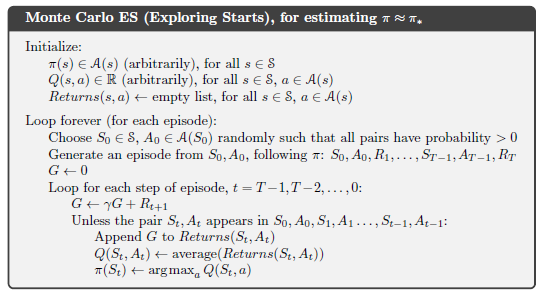

## Monte Carlo Control without Exploring Starts

We made two unlikely assumptions above in order to easily obtain this guarantee of
convergence for the Monte Carlo method. One was that the episodes have exploring
starts, and the other was that policy evaluation could be done with an infinite number of
episodes. To obtain a practical algorithm we will have to remove both assumptions.

The only general way to
ensure that all actions are selected infinitely often is for the agent to continue to select
them. There are two approaches to ensuring this, resulting in what we call on-policy
methods and o↵-policy methods. On-policy methods attempt to evaluate or improve the
policy that is used to make decisions, whereas o↵-policy methods evaluate or improve
a policy di↵erent from that used to generate the data. The Monte Carlo ES method
developed above is an example of an on-policy method.

In on-policy control methods the policy is generally soft, meaning that $\pi(a|s)>0, \forall s \in \mathcal{S}, \forall a \in \mathcal{A}(s)$ but gradually shifted closer and closer to a deterministic optimal policy.

The on-policy method we present in this section uses $\epsilon$-greedy policies, all nongreedy actions are given the minimal probability of selection, $\epsilon/|\mathcal{A}(s)|$.

The overall idea of on-policy Monte Carlo control is still that of GPI. As in Monte Carlo ES, we use first-visit MC methods to estimate the action-value function for the current policy. Without the assumption of exploring starts, however, we cannot simply improve the policy by making it greedy with respect to the current value function, because that would prevent further exploration of nongreedy actions. Fortunately, GPI does not require that the policy be taken all the way to a greedy policy, only that it be moved toward a greedy policy. In our on-policy method we will move it only to an $\epsilon$-greedy policy. For any$\epsilon$-soft policy, $\pi$, any $\epsilon$-greedy policy with respect to $q_\pi$ is guaranteed to be better than or equal to $\pi$.



## Off-policy Prediction via Importance Sampling

A more straightforward approach is to use two policies, one that is learned about and that becomes the optimal policy, and one that is more exploratory and is used to generate behavior. The policy being learned about is called the target policy, and the policy used to generate behavior is called the behavior policy. In this case we say that learning is from data “o↵” the target policy, and the overall process is termed off-policy learning.

We begin the study of off-policy methods by considering the prediction problem, in which both target and behavior policies are fixed. That is, suppose we wish to estimate $v_\pi$ or $q_\pi$, but all we have are episodes following another policy b. In this case, $\pi$ is the target policy, b is the behavior policy, and both policies are considered fixed and given. In order to use episodes from b to estimate values for $\pi$, we require that every action taken under $\pi$ is also taken, at least occasionally, under b. That is, we require that $\pi(a|s) > 0$ implies $b(a|s) > 0$. This is called the assumption of coverage.

Almost all o↵-policy methods utilize importance sampling, a general technique for
estimating expected values under one distribution given samples from another. We apply importance sampling to o↵-policy learning by weighting returns according to the relative probability of their trajectories occurring under the target and behavior policies, called the importance-sampling ratio.